In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [7]:
x = torch.linspace(-1,1,20)
ep = torch.rand(x.shape)*0.1
y = x**2+ep

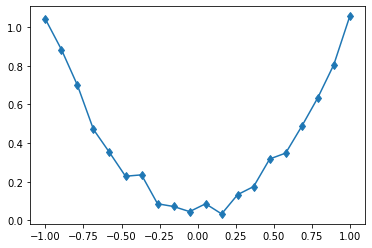

In [8]:
plt.plot(x,y, 'd-')

In [11]:
n = 20
layers = []
layers.append(nn.Linear(1,n))
layers.append(nn.ReLU())
layers.append(nn.Linear(n,n))
layers.append(nn.ReLU())
layers.append(nn.Linear(n,1))

mlp = nn.Sequential(*layers)

In [14]:
xb, yb = x[:, None], y[:, None]
print(x.shape, xb.shape)

torch.Size([20]) torch.Size([20, 1])


In [16]:
yprime = mlp(xb)
yprime.shape

torch.Size([20, 1])

In [20]:
yprime2 = yprime.squeeze().detach()

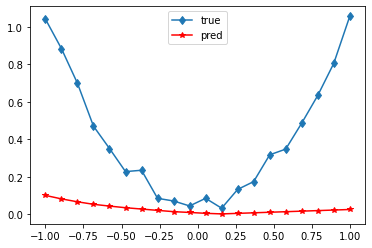

In [24]:
plt.plot(x,y, 'd-', label = 'true')
plt.plot(x, yprime2, '*r-', label= 'pred')
plt.legend()

In [25]:
loss = F.mse_loss(yb,yprime )
loss

tensor(0.2406, grad_fn=<MeanBackward0>)

In [26]:
loss.backward()

In [28]:
lr  = 1e-1
for name, param in mlp.named_parameters():
#     print(param)
    param.data = param.data - param.grad*lr

In [29]:
mlp.zero_grad()

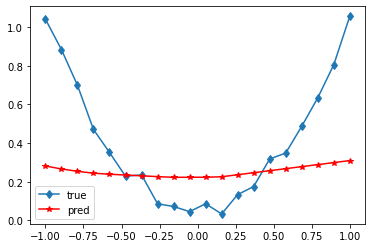

In [30]:
yprime = mlp(xb)
yprime2 = yprime.squeeze().detach()
plt.plot(x,y, 'd-', label = 'true')
plt.plot(x, yprime2, '*r-', label= 'pred')
plt.legend()

# loop 

In [35]:
epochs = 100
for i in range(epochs):
    yprime = mlp(xb)
    loss = F.mse_loss(yb,yprime )
    loss.backward()
    lr  = 1e-1
    for name, param in mlp.named_parameters():
        param.data = param.data - param.grad*lr
    mlp.zero_grad()

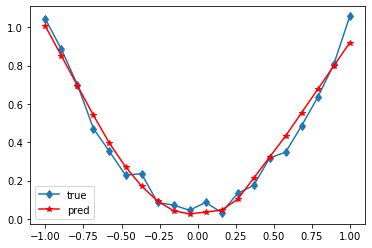

In [36]:
yprime = mlp(xb)
yprime2 = yprime.squeeze().detach()
plt.plot(x,y, 'd-', label = 'true')
plt.plot(x, yprime2, '*r-', label= 'pred')
plt.legend()

In [39]:
x2 = torch.linspace(-1,1,200)
x2b = x2[:, None]

In [40]:
y2prime = mlp(x2b)

In [41]:
y2prime_2 = y2prime.squeeze().detach()

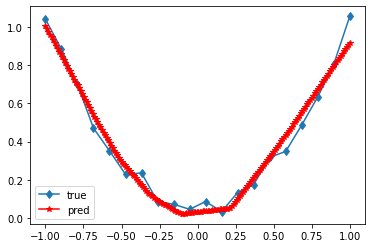

In [42]:
plt.plot(x,y, 'd-', label = 'true')
plt.plot(x2, y2prime_2, '*r-', label= 'pred')
plt.legend()